# Introduction to Machine Learning  Workshop Series by HMTE UP


## Session 2: Introduction to Machine Learning

##### Author: Anggita Permatasari, S.T

##**Welcome!**

In this module, we will learn more about **Machine Learning with Python**. Hope you enjoy!

If you have any question regarding this module, don't hesitate to hit me up through:

https://www.instagram.com/anggitaaps/

https://www.linkedin.com/in/anggitaaps/

# :)

## **Disclaimer [PLEASE READ]**
This following module is written by **Anggita Permatasari** for **Introduction to Machine Learning Workshop by HMTE UP 2021**. This notebook is intended for **personal use** only by the individuals who have the access. Please do not reproduce and distribute this notebook in any form outside these individuals without permission.

Thank you for understanding, cheers!

## Outline

- Definition of Machine Learning
- Type of Machine Learning
- Hands on! Loan Prediction


# **A. Definition**

* Machine learning is the subfield of computer science that gives "computers the ability to learn without being explicitly programmed". The term machine learning was coined in 1959 by **Arthur Samuel**, an American IBMer and pioneer in the field of computer gaming and artificial intelligence. 

* A computer program is said to learn from **Experience (E)** with respect to some class of **Tasks (T)** and **Performances Measure (P)**, if its performance at tasks in **T** , as measured by **P**, improves with experiences **E**.

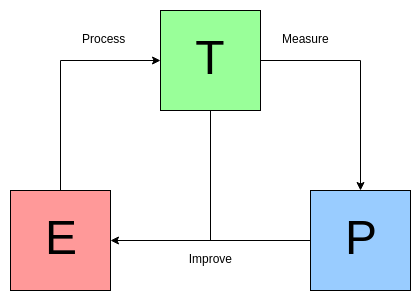


Machine learning algorithms build a model based on sample data, known as "training data", in order to make predictions or decisions without being explicitly programmed to do so. Machine learning algorithms are used in a wide variety of applications, such as face recognition, online translator, map ETA prediction, etc.

# **B. Type of Machine Learning**

There are 3 (three) types of machine learning:
1. Supervised Learning

  This type of machine learning is trained with labeled data.
Supervised learning learns through data whose output we already know and determine.

  There are two types of common supervised learning:
  * Regression
  
    used to predict a **continuous** value
  *Classification

    used to predict a **discrete** value

2. Unsupervised Learning

  This type of machine learning is trained with an unlabeled data.
Unsupervised learning learns **something new** from the data, because there is **no desired output**.

3. Reinforcement Learning 
  This type of machine learning features an algorithm that improves upon itself and learns from new situations. 

# **C.  Loan Prediction using Random Forest**

Objective: to predict which customer will have their loans approved

### **1. Data Gathering**


The dataset used for this notebook is from:

https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset

There are lot of notebooks available there, kindy check it out!

##### 1.1. Import Library and Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

##### 1.2. Import and Load Dataset

In [3]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving train_u6lujuX_CVtuZ9i (1).csv to train_u6lujuX_CVtuZ9i (1).csv


In [4]:
df_train = pd.read_csv('train_u6lujuX_CVtuZ9i (1).csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


#####1.3. Check the information of the dataset

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


From the result, we can see that there are several types of data. For prediction purpose, we wish to only use the **numerical** types of data.

In [6]:
df_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Knowing the statistical value of the data help us to know further to data transformation and analysis.

In [7]:
#print all of the data types and their unique values
for column in df_train.columns:
  if df_train[column].dtype == object:
    print(str(column) + ' : '+str(df_train[column].unique()))
    print(df_train[column].value_counts())
    print('_____________________________________________________________________')

Loan_ID : ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP0012

##### 1.4 Check Missing Values

In [ ]:
#Get a count of the missing values for each column
df_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### **2. Data Preprocessing**


Data preprocessing step is a step where we transform our data, from **raw** data into **understandable** data.

We can transform our data using following techniques:
1. Change missing values into it's statistical value
2. Drop the data with missing value.
3. Drop the redundant data
4. Feature Engineering

#### **2.1 Handling Missing Value**



**Missing Values of `Gender`, `Married`, `Self_Employed`**

In [8]:
df_train['Gender'] = df_train['Gender'].fillna(df_train['Gender'].mode())
df_train['Married'] = df_train['Married'].fillna(df_train['Married'].mode())
df_train['Self_Employed'] = df_train['Self_Employed'].fillna(df_train['Self_Employed'].mode())

**Missing Values of `LoanAmount`**

In [9]:
df_train['LoanAmount'] = df_train['LoanAmount'].fillna(df_train['LoanAmount'].mean())

**Missing Values of `Credit_History`**

In [10]:
df_train['Credit_History'] = df_train['Credit_History'].fillna(df_train['Credit_History'].median())

**Missing Values of `Dependents` and `Loan_Amount_Term`**

In [11]:
df_train.dropna(inplace=True)

**Check again, and done!**

In [12]:
#Get a count of the missing values for each column
df_train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### **2.2 Drop Redundant Feature**



**Drop `Loan_ID` column from `df_train`**

`Loan_ID` is just a set of unique numbers, it doesn't works as a predictor at all. So, it's better to just remove it. 

In [13]:
df_train.drop('Loan_ID', inplace=True, axis = 1)

In [14]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


#### **2.3 Object Type Mapping into Numerical Values**



An object type data can not be used as a **variable predictor.** In that way, we need to change the type by mapping it to the other type of data.



*   `Gender`




In [16]:
df_train.Gender = df_train.Gender.map({'Male':1, 'Female':0})



*   `Married`




In [17]:
df_train.Married = df_train.Married.map({'Yes':1, 'No':0})



*   `Education`




In [18]:
df_train.Education = df_train.Education.map({'Graduate':1, 'Not Graduate':0})



*   `Self_Employed`




In [19]:
df_train.Self_Employed = df_train.Self_Employed.map({'Yes':1, 'No':0})



*   `Dependents`




In [20]:
df_train.Dependents = df_train.Dependents.map({'0':0, '1':1, '2':2, '3+':3})



*   `Property_Area`




In [21]:
df_train.Property_Area = df_train.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})



*   `Loan_Status`




In [22]:
df_train.Loan_Status = df_train.Loan_Status.map({'Y':1, 'N':0})
df_train.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status            int64
dtype: object

In [23]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,1,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,1,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,1,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,1,1
612,1,1,2,1,0,7583,0.0,187.000000,360.0,1.0,1,1


####**2.4. Let's Visualize!**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

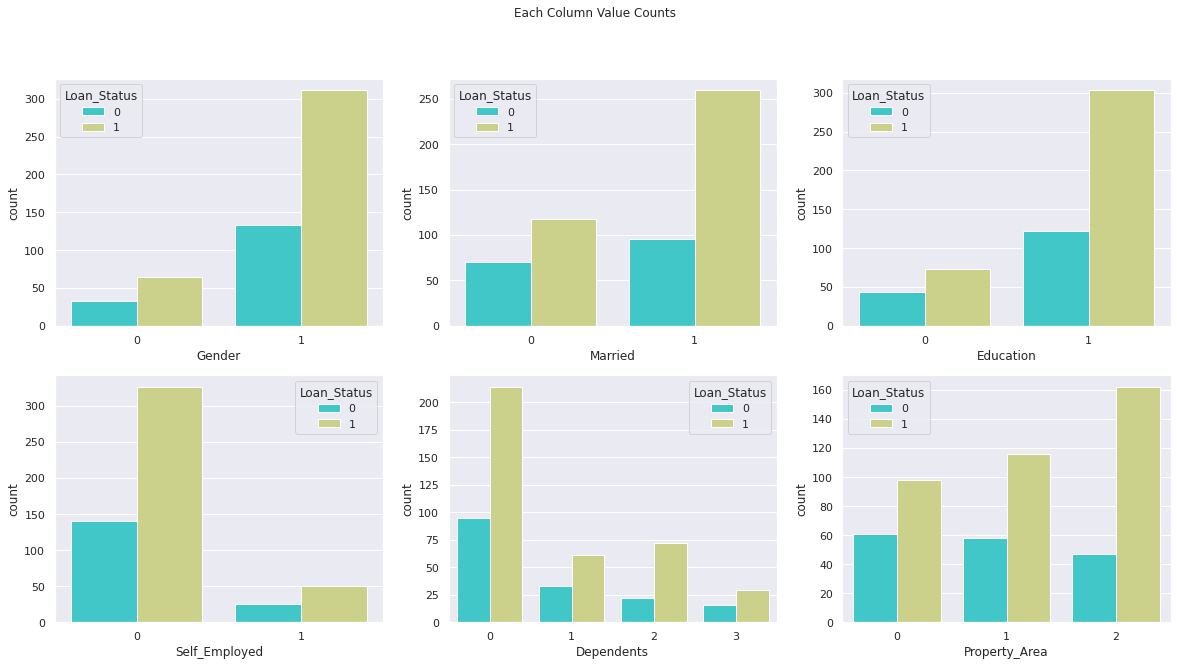

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))

fig.suptitle('Each Column Value Counts')

sns.countplot(df_train['Gender'], hue = df_train['Loan_Status'], ax=axes[0, 0], palette='rainbow')
sns.countplot(df_train['Married'], hue = df_train['Loan_Status'], ax=axes[0, 1], palette='rainbow')
sns.countplot(df_train['Education'], hue = df_train['Loan_Status'], ax=axes[0, 2], palette='rainbow')
sns.countplot(df_train['Self_Employed'], hue = df_train['Loan_Status'], ax=axes[1, 0], palette='rainbow')
sns.countplot(df_train['Dependents'], hue = df_train['Loan_Status'], ax=axes[1, 1], palette='rainbow')
sns.countplot(df_train['Property_Area'], hue = df_train['Loan_Status'], ax=axes[1, 2], palette='rainbow')

In [25]:
#print all of the data types and their unique values
for column in df_train.columns:
  if df_train[column].dtype == int:
    print(str(column) + ' : '+str(df_train[column].unique()))
    print(df_train[column].value_counts())
    print('_____________________________________________________________________')

Gender : [1 0]
1    444
0     98
Name: Gender, dtype: int64
_____________________________________________________________________
Married : [0 1]
1    355
0    187
Name: Married, dtype: int64
_____________________________________________________________________
Dependents : [0 1 2 3]
0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64
_____________________________________________________________________
Education : [1 0]
1    425
0    117
Name: Education, dtype: int64
_____________________________________________________________________
Self_Employed : [0 1]
0    467
1     75
Name: Self_Employed, dtype: int64
_____________________________________________________________________
ApplicantIncome : [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  3073
  1853  1299  4950  3596  3510  4887  7660  5955  2600  9560  2799  4226
  1442  3167  4692  3500 12500  2275  3667  4166  3748  3600  1800  2400
  3941  5649  5821  2645  4000  1928  3086  4230  4616 11500 

####**2.5. Find the coorelation**

In [ ]:
corr = df_train.corr()
corr.style.background_gradient(cmap='gist_earth_r').set_precision(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.00,0.35,0.20,-0.06,-0.02,0.04,0.16,0.11,-0.09,0.02,-0.10,0.03
Married,0.35,1.00,0.36,-0.01,-0.01,0.03,0.11,0.16,-0.12,0.03,0.01,0.11
Dependents,0.20,0.36,1.00,-0.07,0.06,0.11,-0.02,0.14,-0.10,-0.04,-0.01,0.01
Education,-0.06,-0.01,-0.07,1.00,0.02,0.14,0.07,0.16,0.10,0.05,0.05,0.08
Self_Employed,-0.02,-0.01,0.06,0.02,1.00,0.17,-0.03,0.13,-0.03,-0.03,-0.02,-0.02
ApplicantIncome,0.04,0.03,0.11,0.14,0.17,1.00,-0.10,0.51,0.00,-0.05,-0.02,-0.04
CoapplicantIncome,0.16,0.11,-0.02,0.07,-0.03,-0.10,1.00,0.19,-0.01,0.00,-0.01,-0.04
LoanAmount,0.11,0.16,0.14,0.16,0.13,0.51,0.19,1.00,0.08,-0.03,-0.03,-0.06
Loan_Amount_Term,-0.09,-0.12,-0.10,0.10,-0.03,0.00,-0.01,0.08,1.00,0.02,0.01,-0.01
Credit_History,0.02,0.03,-0.04,0.05,-0.03,-0.05,0.00,-0.03,0.02,1.00,0.04,0.52


from the result shown above,, we can see that `Credit_History` have a quite high positive correlation number (0.52). That means, our target (`Loan_Status`) is highly dependant with `Credit_History`

### **3. Model Selection**


For this experiment, we use Random Forest Classifier to predict the `Loan_Status`

#### **3.1 Import Libraries**



In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

### **4. Training and Validation**


The Process of Training the Data:

*   Importing the model
*   Fitting the model
*   Predicting Loan Status
*   Classification report by Loan Status
*   Overall accuracy













####**4.1 Data Train, Test (Validation) Split**



In [27]:
X = df_train.drop('Loan_Status', axis = 1)
y = df_train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

####**4.2 Train and Validate Model using Random Forest Classifier**



In [51]:
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

y_predict = RF.predict(X_test)

#  prediction Summary by species
print(classification_report(y_test, y_predict))

# Accuracy score
RF_Score = accuracy_score(y_predict,y_test)
print(f"{round(RF_Score*100,2)}% Accurate")

              precision    recall  f1-score   support

           0       0.86      0.38      0.53        47
           1       0.80      0.97      0.88       116

    accuracy                           0.80       163
   macro avg       0.83      0.68      0.70       163
weighted avg       0.81      0.80      0.78       163

80.37% Accurate


**Make new dataframe**

In [29]:
Loan_Status_Validation=pd.DataFrame({'y_test':y_test,'prediction':y_predict})

In [30]:
Loan_Status_Validation

,y_test,prediction
433,1,1
178,1,1
151,1,1
518,0,1
101,1,1
...,...,...
585,0,1
200,1,1
404,0,1
484,1,1


###**5. Make Prediction**



#### **5.1. Load Testing Dataset**

In [31]:
#Load the data
from google.colab import files
uploaded = files.upload()

Saving test_Y3wMUE5_7gLdaTN.csv to test_Y3wMUE5_7gLdaTN.csv


In [41]:
df_test = pd.read_csv('test_Y3wMUE5_7gLdaTN.csv')
df_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#### **5.2 Drop Missing Values**



In [42]:
df_test.dropna(inplace=True)

#### **5.3 Drop Redundant Feature**



In [43]:
df_test.drop('Loan_ID', inplace=True, axis = 1)

In [44]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
5,Male,Yes,0,Not Graduate,Yes,2165,3422,152.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
361,Male,Yes,1,Graduate,No,2269,2167,99.0,360.0,1.0,Semiurban
362,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
365,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


#### **5.4 Object Type Mapping into Numerical Values**



In [45]:
df_test.Gender = df_test.Gender.map({'Male':1, 'Female':0})
df_test.Married = df_test.Married.map({'Yes':1, 'No':0})
df_test.Education = df_test.Education.map({'Graduate':1, 'Not Graduate':0})
df_test.Self_Employed = df_test.Self_Employed.map({'Yes':1, 'No':0})
df_test.Dependents = df_test.Dependents.map({'0':0, '1':1, '2':2, '3+':3})
df_test.Property_Area = df_test.Property_Area.map({'Urban':1, 'Rural':0, 'Semiurban':2})

In [46]:
df_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,1
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,1
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,1
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,1
5,1,1,0,0,1,2165,3422,152.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
361,1,1,1,1,0,2269,2167,99.0,360.0,1.0,2
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,1
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,1
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,0


#### **5.5 Make Prediction**



In [47]:
y_test_predict = RF.predict(df_test)

**Make a new dataframe**

In [48]:
Loan_Status_Prediction=pd.DataFrame({'y_test_predict':y_test_predict})
Loan_Status_Prediction

,y_test_predict
0,1
1,1
2,1
3,0
4,1
...,...
284,1
285,1
286,1
287,1


# Thank you!

Thank you for using this module, I hope you enjoy and learn much more from this module:)





Best Regards,

Anggita